# Tasks 2: Exploratory Data Analysis (EDA)

# Importing Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Loading DataSet

In [52]:
Data=pd.read_csv("encoded_dataset.csv")
Data

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,Yes,No,1,No,No,Yes,No,No,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,No,No,34,Yes,Yes,No,Yes,No,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,No,No,2,Yes,Yes,Yes,No,No,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,No,No,45,No,Yes,No,Yes,Yes,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,...,True,False,False,False,True,False,False,False,False,True
7039,2234-XADUH,0,Yes,Yes,72,Yes,No,Yes,Yes,No,...,False,True,False,False,True,False,False,True,False,False
7040,4801-JZAZL,0,Yes,Yes,11,No,Yes,No,No,No,...,True,False,False,True,False,False,False,False,True,False
7041,8361-LTMKD,1,Yes,No,4,Yes,No,No,No,No,...,False,True,False,True,False,False,False,False,False,True


# 1.Calculate and visualize the overall chrun rate.

In [53]:
churn_rate = Data["Churn"].value_counts(normalize=True)["Yes"]
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 26.54%


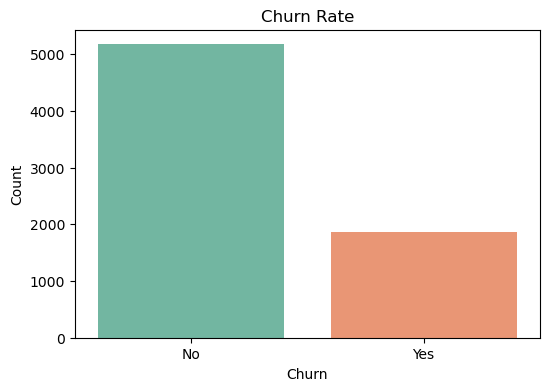

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=Data, palette="Set2")
plt.title("Churn Rate")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 2.Explore customer distribution by various demographics.

In [62]:
# Define the demographic columns
demographic_columns = [
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
    'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL',
    'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month',
    'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

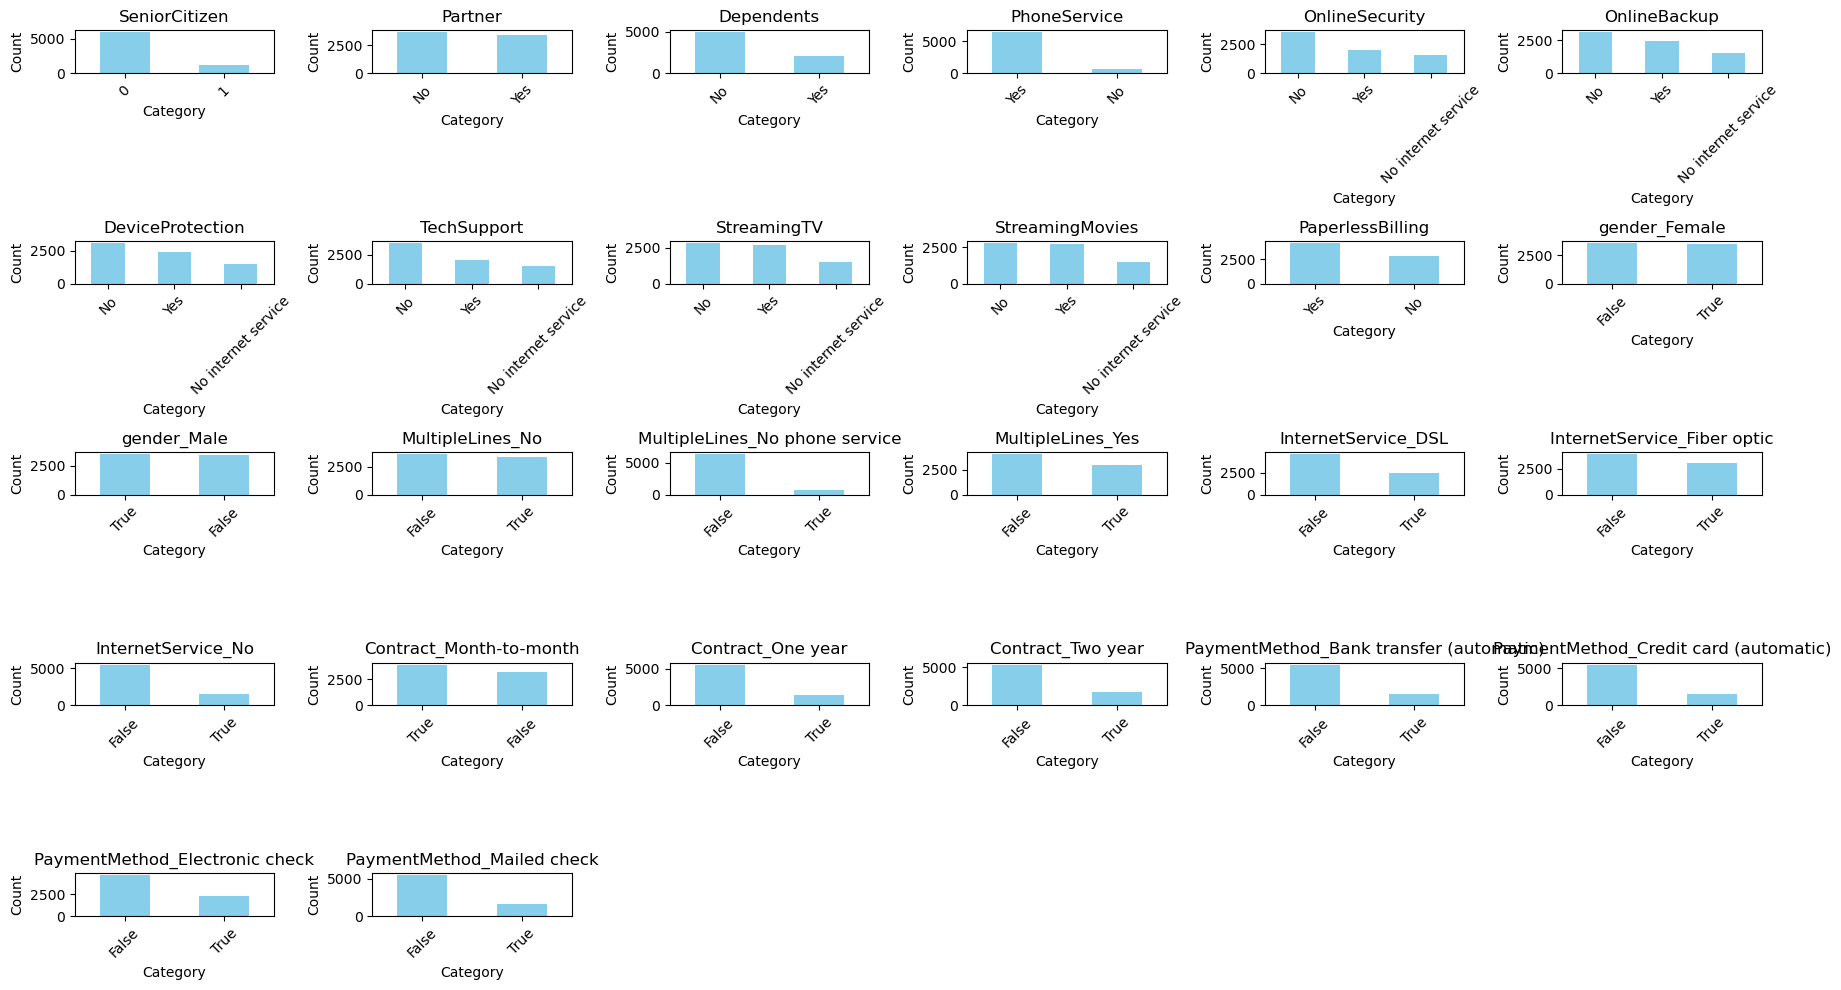

In [68]:
# Explore customer distribution by various demographics
plt.figure(figsize=(18, 10))
for i, col in enumerate(demographic_columns, 1):
    plt.subplot(5, 6, i)
    Data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# 3.Analyze tenure distribution

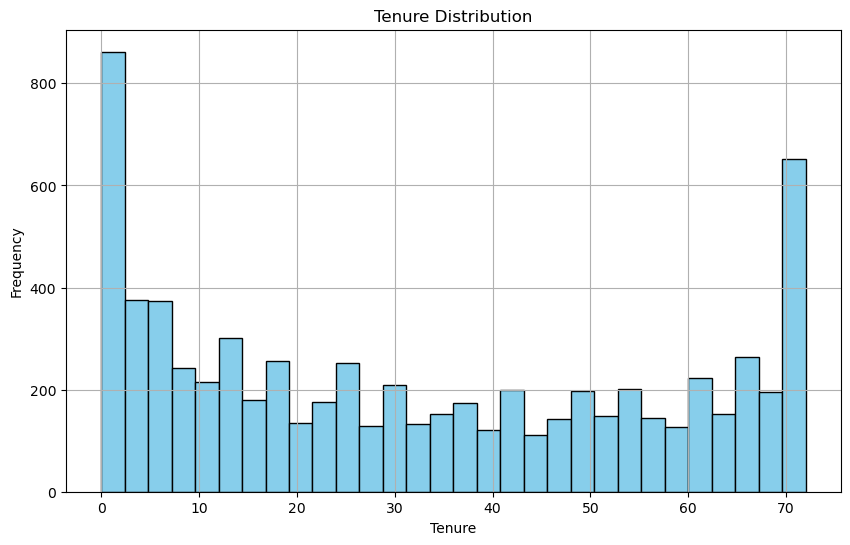

In [70]:
# Analyze tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(Data['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4.Investigate relationships between churn and different contract types/payement methods.

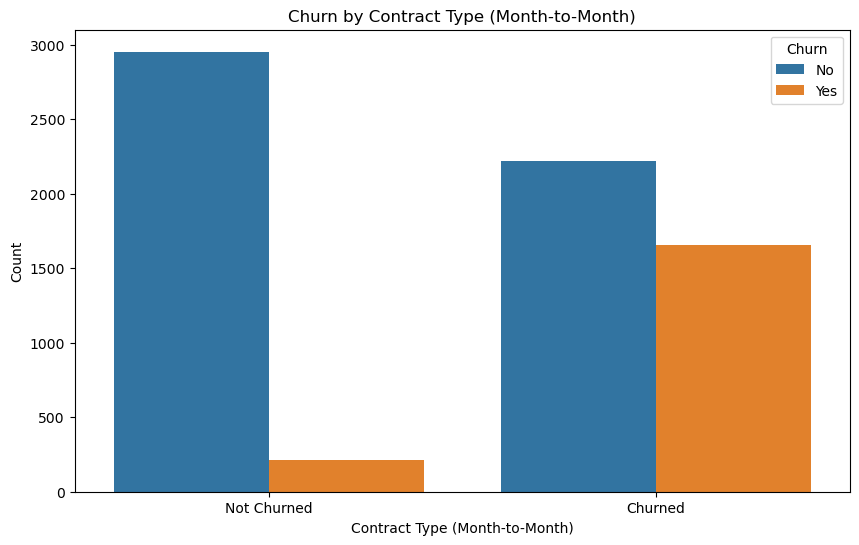

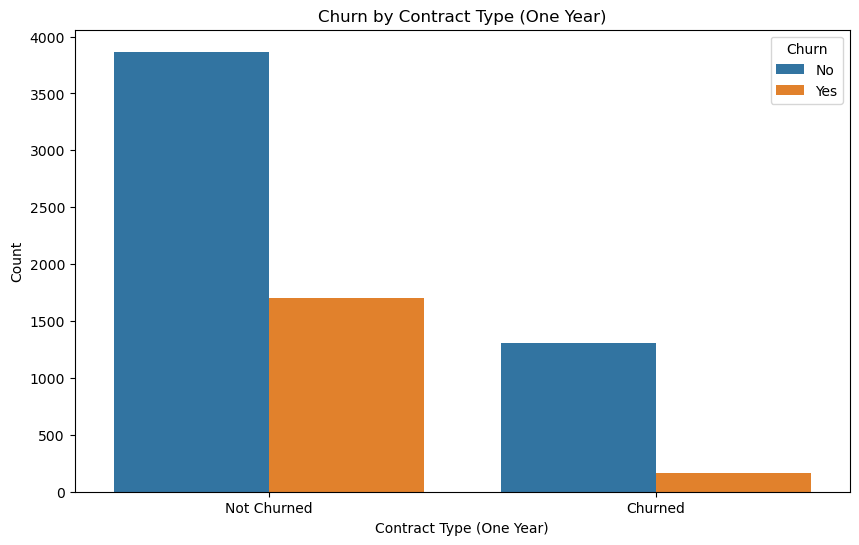

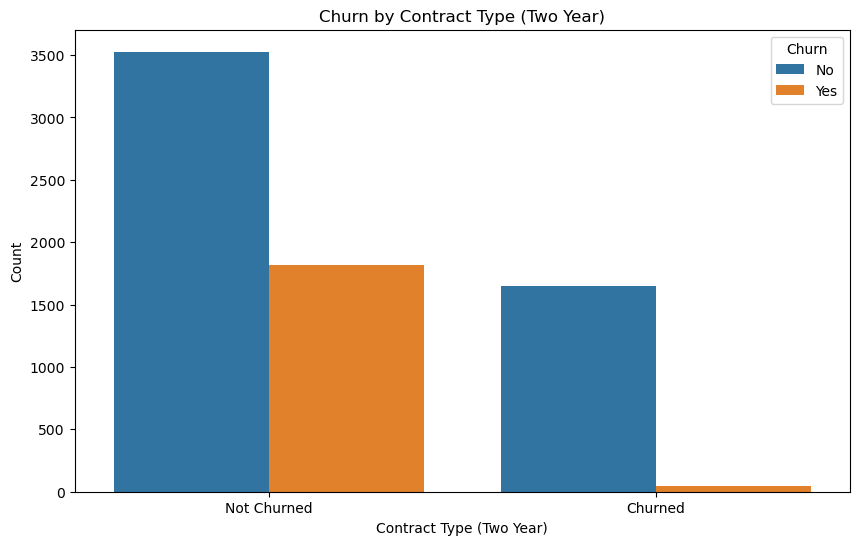

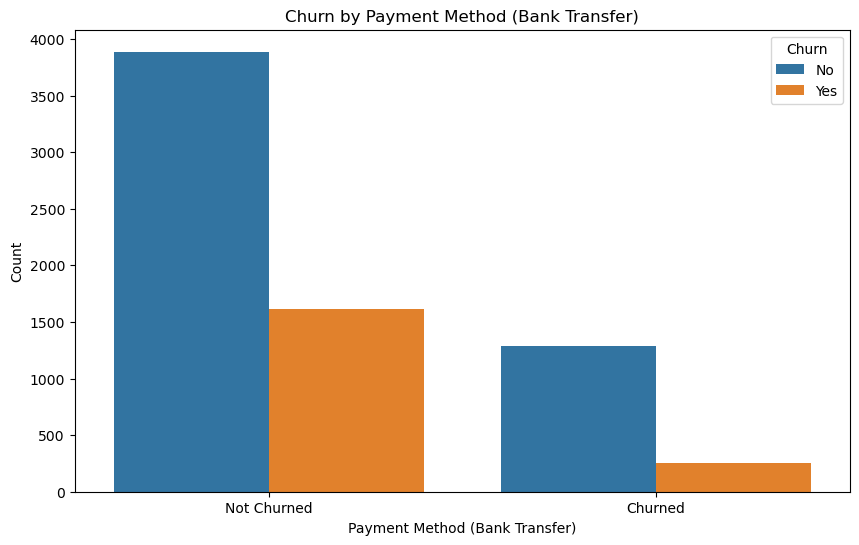

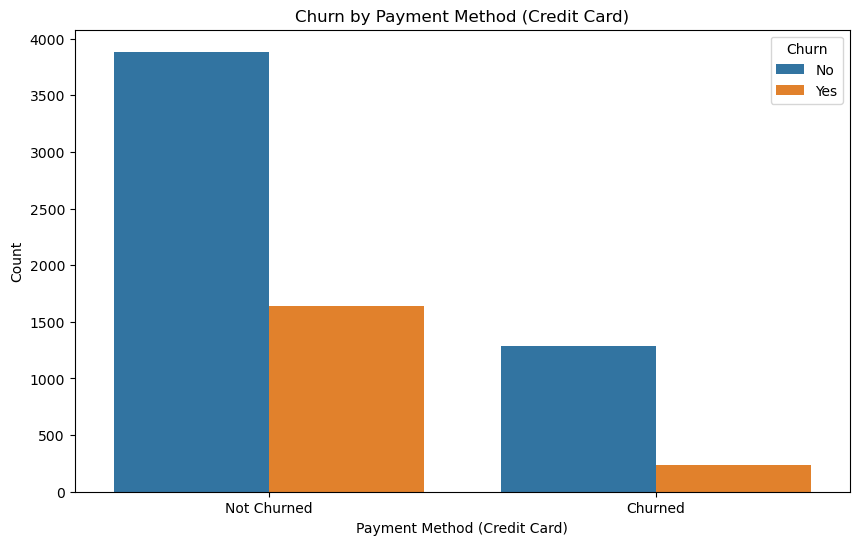

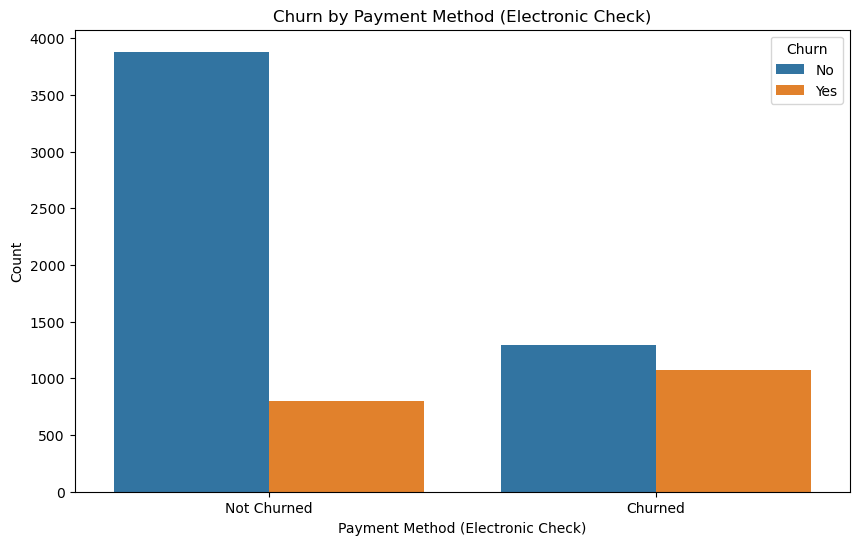

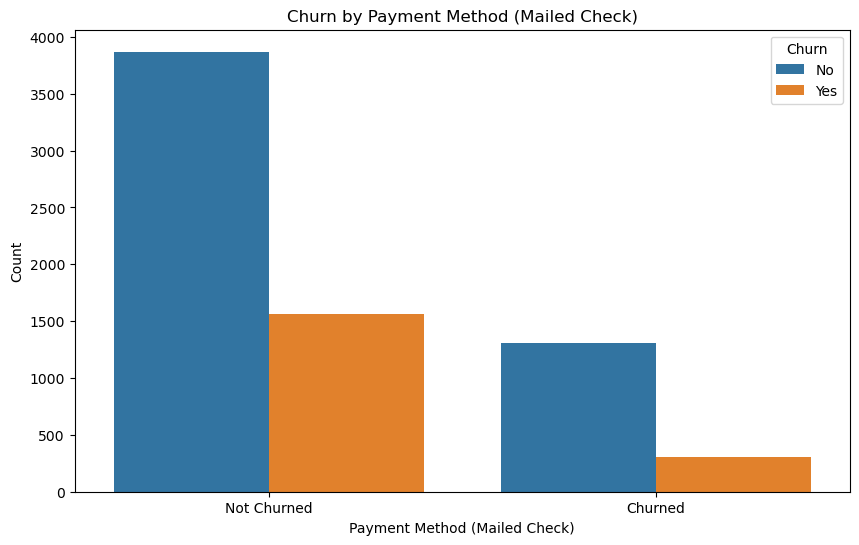

In [77]:
# Investigate relationships between churn and contract types
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract_Month-to-month', hue='Churn', data=Data)
plt.title('Churn by Contract Type (Month-to-Month)')
plt.xlabel('Contract Type (Month-to-Month)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract_One year', hue='Churn', data=Data)
plt.title('Churn by Contract Type (One Year)')
plt.xlabel('Contract Type (One Year)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract_Two year', hue='Churn', data=Data)
plt.title('Churn by Contract Type (Two Year)')
plt.xlabel('Contract Type (Two Year)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

# Investigate relationships between churn and payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod_Bank transfer (automatic)', hue='Churn', data=Data)
plt.title('Churn by Payment Method (Bank Transfer)')
plt.xlabel('Payment Method (Bank Transfer)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod_Credit card (automatic)', hue='Churn', data=Data)
plt.title('Churn by Payment Method (Credit Card)')
plt.xlabel('Payment Method (Credit Card)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod_Electronic check', hue='Churn', data=Data)
plt.title('Churn by Payment Method (Electronic Check)')
plt.xlabel('Payment Method (Electronic Check)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod_Mailed check', hue='Churn', data=Data)
plt.title('Churn by Payment Method (Mailed Check)')
plt.xlabel('Payment Method (Mailed Check)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()
